### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text 
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

#Library for Splitting Dataset
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [3]:
train = pd.read_csv(r"C:\Users\HP\Desktop\RESEARCH\train.csv")

In [4]:
test = pd.read_csv(r"C:\Users\HP\Desktop\RESEARCH\test.csv")

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
train.shape

(7613, 5)

**There are 7613 rows and 5 columns**

In [8]:
print("Number of rows = ",train.shape[0], "\nNumber of columns = ", train.shape[1])

Number of rows =  7613 
Number of columns =  5


In [9]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

**There are 4342 tweets not about any disaster and 3271 tweets are about disaster**

Text(0.5, 1.0, 'Target Distribution \n 0: Non disaster | 1: Disaster')

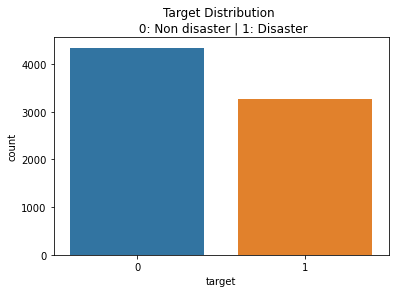

In [10]:
#Visualization of count of target
sns.countplot(x = 'target', data = train)
plt.title('Target Distribution \n 0: Non disaster | 1: Disaster', fontsize = 12)

In [11]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

**There are null values in the columns keyword and location**

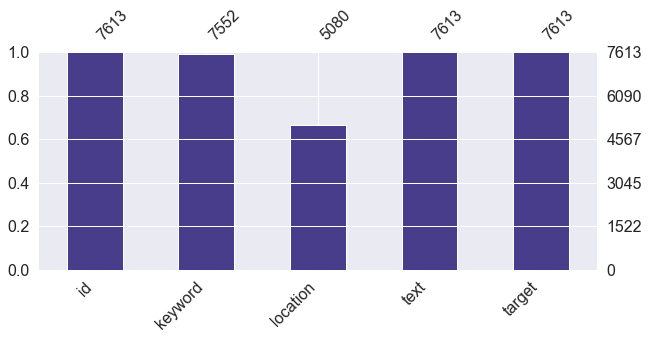

In [22]:
#Visualization of missing values
import missingno as msno
msno.bar(train, figsize = (10,4), color = "#483D8B")
sns.set(font_scale = 1)
plt.show()

In [51]:
#keywords evaluation
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [52]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

### Plotting disaster and non-disaster keywords

Text(0.5, 1.0, 'Top 10 keywords of disaster tweets')

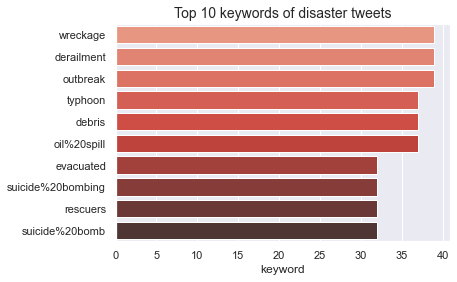

In [53]:
disaster_keywords = train.loc[train['target'] == 1]['keyword'].value_counts()
nondisaster_keywords = train.loc[train['target'] == 0]['keyword'].value_counts()

sns.barplot(y = disaster_keywords[:10].index, x=disaster_keywords[0:10], orient='h', palette="Reds_d")
plt.title('Top 10 keywords of disaster tweets', fontsize = 14)

Text(0.5, 1.0, 'Top 10 keywords of non-disaster tweets')

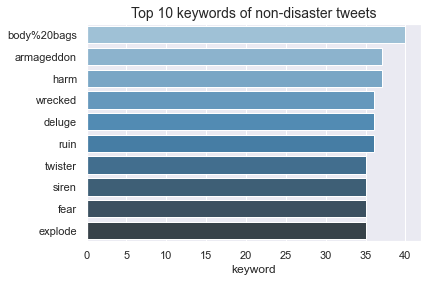

In [54]:
sns.barplot(y = nondisaster_keywords[:10].index, x = nondisaster_keywords[0:10], orient='h', palette="Blues_d")
plt.title('Top 10 keywords of non-disaster tweets', fontsize = 14)

### Most frequently used disaster and  non-disaster keywords

In [23]:
top_disaster_keywords = train.groupby('keyword').mean()['target'].sort_values(ascending = False).head(20)
top_nondisaster_keywords = train.groupby('keyword').mean()['target'].sort_values().head(20)

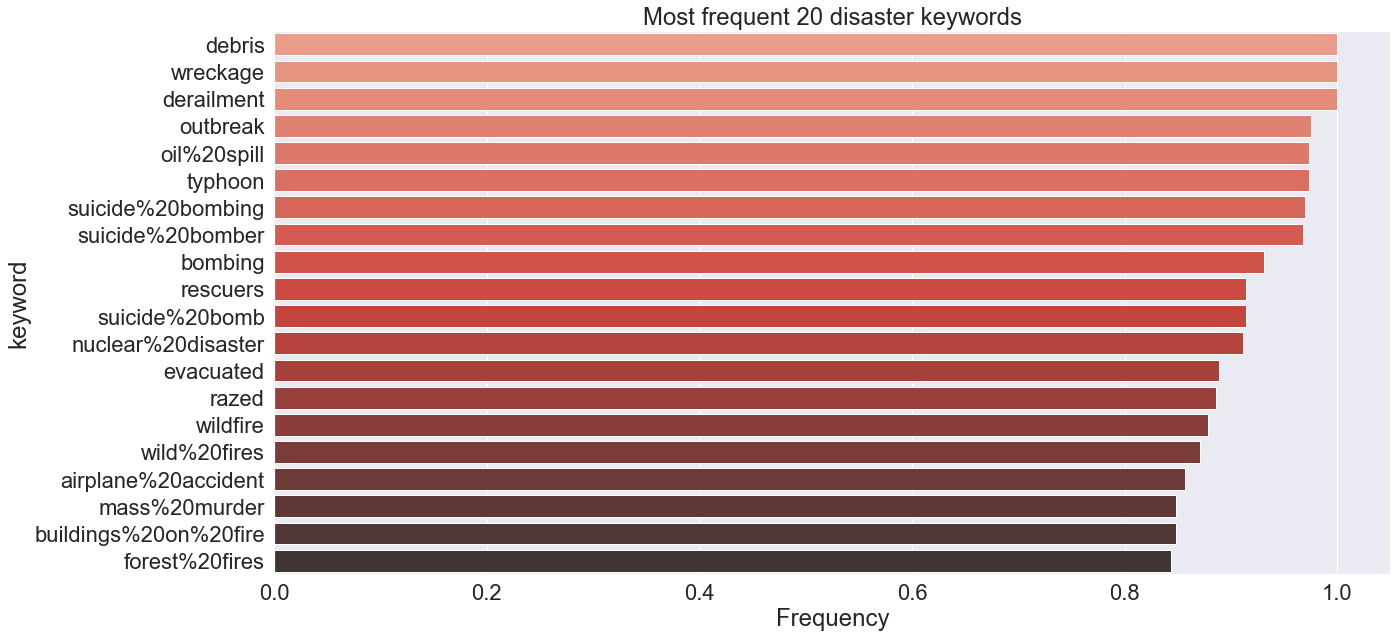

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x = top_disaster_keywords[:20],y = top_disaster_keywords[:20].index, orient = 'h', palette = 'Reds_d')
sns.set(font_scale = 2)
plt.title("Most frequent 20 disaster keywords")
plt.xlabel("Frequency")
plt.show()

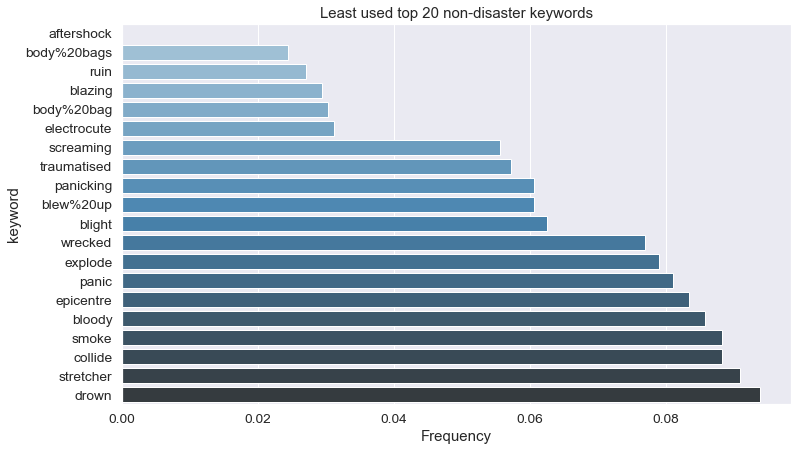

In [65]:
plt.figure(figsize = (12,7))
sns.barplot(x = top_nondisaster_keywords[:20],y = top_nondisaster_keywords[:20].index, orient = 'h', palette = 'Blues_d')
sns.set(font_scale = 1.25)
plt.title("Least used top 20 non-disaster keywords")
plt.xlabel("Frequency")
plt.show()

### Location Tracing

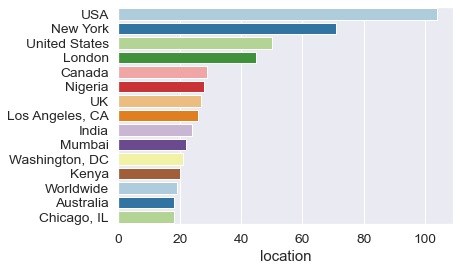

In [66]:
locate = train['location'].value_counts()
sns.barplot(x = locate[:15], y = locate[:15].index, orient = 'h', palette = "Paired")
sns.set(font_scale = 1)

**We can see that most of the tweets are from USA**

## Text Preprocessing

#### 1. Removing Punctuation

In [59]:
# string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [222]:
# def clean_text(text):
#     cleantext = [char for char in text if char not in string.punctuation]
#     cleantext = ''.join(cleantext)
#     return cleantext

In [223]:
# train['clean text'] = train['text'].apply(clean_text)

In [224]:
# train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


#### 2. Removing noise

In [38]:
train = pd.read_csv(r"C:\Users\HP\Desktop\RESEARCH\train.csv")

In [39]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
     "zzz" : "sleeping bored and tired"
}

In [40]:
# noise removing functions

# def url_remove(text):
#     nourl = re.sub('https?://\S+|www\.\S+','',text)
#     return nourl

In [41]:
#removing punctuation
def clean_text(text):
    cleantext = [char for char in text if char not in string.punctuation]
    cleantext = ''.join(cleantext)
    return cleantext

#removing urls
def url_remove(text):
    no_url = re.compile(r'https?://\S+|www\.\S+')
    return no_url.sub(r'',text)

#remove HTML
def html_remove(text):
    no_html = re.compile(r'<.*?>')
    return no_html.sub(r'',text)

#removing non printable characters
def not_ASCII_remove(text):
    asciiword = [word for word in text if word in string.printable]
    text = ''.join(asciiword)
    return t
ext

#changing abbreviations by it's true meaning
def word_abbreviation(word):
     return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbreviation(text):
    string = ""
    for word in text.split():
        string += word_abbreviation(word) + " "        
    return string

#removing mention and replacing by USER
def mention_remove(text):
    mention = re.compile(r'@\S+')
    return mention.sub(r'',text)

#removing numbers and replacing it by NUMBER
def number_remove(text):
    number = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return number.sub(r'', text)

#removing emojis and replacing by EMOJI
def emoji_remove(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Replacing other smileys with SADFACE
def sad_transcription(text):
    eye = "[8:=;]"
    nose = "['`\-]"
    smile = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smile.sub(r'', text)

#replacing some smileys with SMILE
def smile_transcription(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    return smiley.sub(r'', text)

#Replacing <3 with HEART
def heart_transcription(text):
    h = re.compile(r'<3')
    return h.sub(r'',text)

In [42]:
def cleantweets(text):
    text = clean_text(text)
    text = url_remove(text)
    text = html_remove(text)
    text = not_ASCII_remove(text)
    text = replace_abbreviation(text)
    text = mention_remove(text)
    text = number_remove(text)
    text = emoji_remove(text)
    text = sad_transcription(text)
    text = smile_transcription(text)
    text = heart_transcription(text)
    return text
    

In [43]:
# train['clean text'] = ''
train['clean text'] = train['text'].apply(cleantweets)
train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


### Removing stopwords

In [52]:
# stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

# def remove_stopwords(text):
#     remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]
#     return remove_stopword

In [53]:
train['clean text'] = train['clean text'].apply(remove_stopwords)
train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


### Word cloud - entire data

In [15]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train['clean text']))

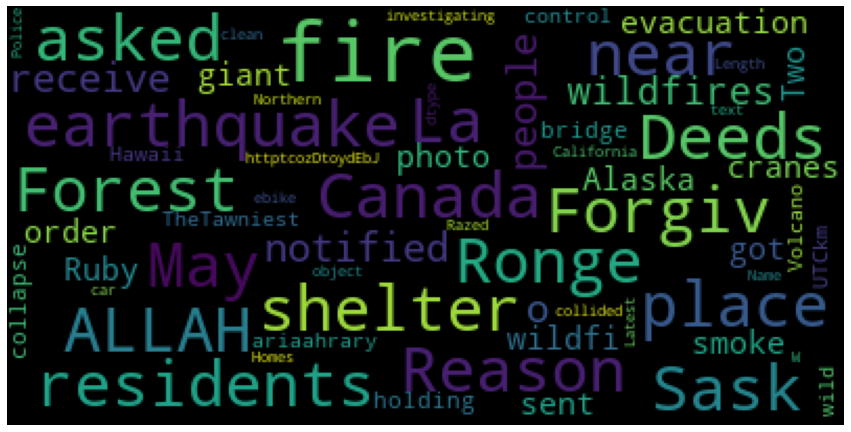

In [16]:
print(wordcloud)
fig = plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word cloud of disaster tweets

In [17]:
disaster = train.loc[train['target'] == 1]['clean text']

In [18]:
wc_disaster = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(disaster))

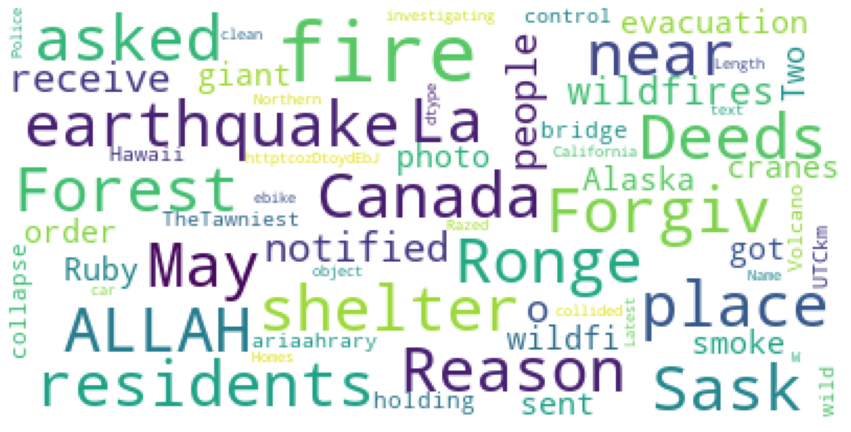

In [19]:
print(wc_disaster)
fig = plt.figure(figsize = (15,15))
plt.imshow(wc_disaster)
plt.axis('off')
plt.show()

### Wordcloud of non-disaster tweets

In [20]:
non_disaster = train.loc[train['target'] == 0]['clean text']

In [21]:
wc_nondisaster = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=30, 
                          random_state=42
                         ).generate(str(non_disaster))

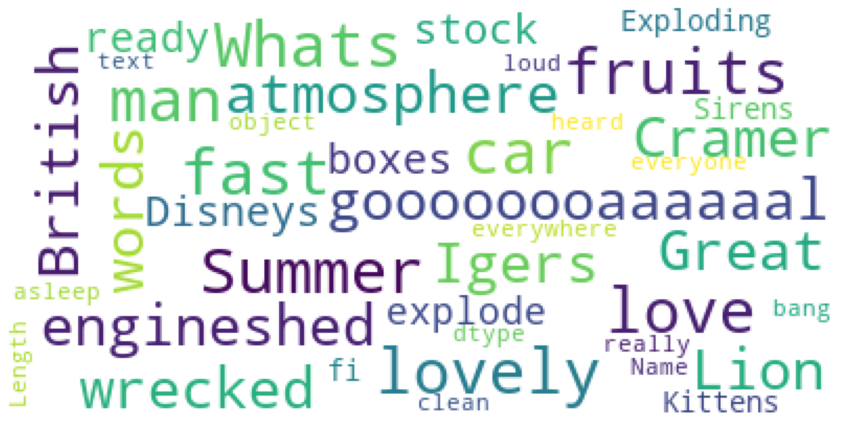

In [22]:
print(wc_nondisaster)
fig = plt.figure(figsize = (15,15))
plt.imshow(wc_nondisaster)
plt.axis('off')
plt.show()

### Most frequent words

In [23]:
t = train['clean text'][0]


In [53]:
text = train['clean text'].values[0]
text
# splitted = text.split(" ")
for i in 

['Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us']

In [62]:
words = list(train['clean text'].values)
words = str(words)
words = nltk.word_tokenize(words)
commonwords = nltk.FreqDist(words)
mostcommon = commonwords.most_common(100)
print(mostcommon)

[("'", 74772), (',', 74378), ('[', 7614), (']', 7614), ("'like", 321), ("'amp", 300), ("'Im", 244), ("'via", 213), ("'get", 185), ("'people", 182), ("'fire", 175), ("'dont", 160), ("'one", 154), ("'would", 119), ("'new", 118), ("'News", 115), ("'California", 113), ("'loud", 111), ("'retweet", 109), ("'know", 109), ("'time", 107), ("'got", 104), ("'New", 104), ("'video", 103), ("'disaster", 102), ("'back", 101), ("'US", 98), ("'buildings", 96), ("'day", 94), ("'going", 94), ("'YouTube", 92), ("'burning", 92), ("'killed", 90), ("'see", 89), ("'still", 89), ("'fires", 88), ("'Hiroshima", 88), ("'cant", 86), ("'go", 86), ("'bomb", 85), ("'crash", 82), ("'think", 81), ("'attack", 80), ("'body", 79), ("'suicide", 79), ("'police", 78), ("'Full", 78), ("'Emergency", 77), ("'life", 75), ("'way", 74), ("'want", 74), ("'say", 74), ("'news", 74), ('na', 74), ("'laughing", 74), ("'car", 73), ("'good", 73), ("'emergency", 72), ("'dead", 72), ("'may", 72), ("'MH", 72), ("'today", 71), ("'train", 71),

### Stemming

In [120]:
stemmer = PorterStemmer()

def stemming(text):
    tokenization = word_tokenize(text)
    stemmed_text = [stemmer.stem(words) for words in tokenization]
    return stemmed_text

In [121]:
train['clean text'] = train['clean text'].apply(stemming)

In [122]:
train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deed, are, the, reason, of, thi, earthqu..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, resid, ask, to, shelter, in, place, are,..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[peopl, receiv, wildfir, evacu, order, in, cal..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, thi, photo, from, rubi, alas..."


### Tokenization

In [106]:
def tokenize(text):
    return nltk.word_tokenize(text)

train['clean text'] = train['clean text'].apply(tokenize)


In [107]:
train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[NUMBER, people, receive, wildfire, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


### Lemmatization

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
#     tokenization = nltk.word_tokenize(text)
    lemmatized_text = ([lemmatizer.lemmatize(words) for words in text.split(" ")])
    return lemmatized_text

In [18]:
train['clean text'][500]

['Christian',
 'Attacked',
 'Muslims',
 'Temple',
 'Mount',
 'Waving',
 'Israeli',
 'Flag',
 'via',
 'Pamela',
 'Geller',
 'httptcoLHBZHWqNUMBERBNUMBER',
 '']

In [17]:
train['clean text'] = train['clean text'].apply(lemmatize)
train.head()

,id,keyword,location,text,target,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada, ]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[NUMBER, people, receive, wildfire, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [272]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
  
stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(example_sent)
  
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [273]:
word_tokens

['This',
 'is',
 'a',
 'sample',
 'sentence',
 ',',
 'showing',
 'off',
 'the',
 'stop',
 'words',
 'filtration',
 '.']